# TP N° 3: Modelo de Hopfield

Implementá una red de Hopfield de N = 500 neuronas con dinámica determinista: 

$S_i(t + 1) = signo(h_i(t))$

donde $h_i(t) = \sum_{j \neq i}^N = w_{ij} S_j(t)$

La red debe almacenar $p$ patrones $\{ \xi_i^\mu = \pm 1\}$ aleatorios e independientes entre sí.
Luego debes colocar inicialmente la red en uno de los patrones, por ejemplo el primero $\mu = 1$, y dejarla evolucionar hasta que alcance un estado estacionario. En el estado estacionario debes medir la superposición:

$m^\mu = \frac{1}{N} \sum_{i=1}^N \xi_i^\mu S_i(\infty)$

A seguir repetí este procedimiento para cada uno de los $p$ padrones almacenados y calculá el promedio de todos ellos $<m><(p) = \frac{1}{p} \sum_{\mu = 1}^p m^\mu$



In [19]:
import numpy as np
from numpy.random import randint

class HopfieldNetwork:
    def __init__(self, N, p):
        self.nNeurons = N
        self.p = p
        self.patterns = self.init_patterns()
        
    def init_patterns(self):
        # Inicializar p patrones aleatorios e independientes entre sí
        patrones = []
        for i in range(self.p):
            pi = []
            isEqual = False
            for n in range(self.nNeurons): #genero nuevo patrón
                pi.append(randint(0, 2)) # añade  0 o +1 de manera aleatoria

            if(len(patrones) == 0):
                patrones.append(pi)
            else:
                for j in range(len(patrones)): 
                    if(np.array_equal(np.array(pi), np.array(patrones[j]))): 
                    # Si es igual a algún patrón ya existente lo vuelvo a generar
                        isEqual = True
                        #print("Es igual")
                        break
                if (not isEqual): # Si no lo guardo y prosigo con el siguiente
                   # print("No es igual")
                    patrones.append(pi)
                    isEqual = False
        patrones = np.array(patrones) * 2 - 1 # Reemplaza 0 por -1
        return patrones  
    
    def train(self):
        # Entrenamiento
        self.W = np.zeros((self.nNeurons, self.nNeurons))
        for ni in range(self.nNeurons):
            for nj in range(self.nNeurons):
                if(ni != nj):  
                    for mu in range(self.patterns.shape[0]):
                        p = self.patterns[mu]
                        self.W[ni,nj] += p[ni] * p[nj]

        self.W = self.W/self.nNeurons     

    def recall(self, S_t0): 
        # recordar un patrón
        S_t1 = np.zeros(S_t0.shape)
        for i in range(self.nNeurons):
            for j in range(self.nNeurons):
                if(j != i):
                    S_t1[i] += self.W[i][j] * S_t0[j]

            S_t1[i] = np.sign(S_t1[i])
            
        return S_t1
    
    def overlap(self, S_t0):
        S_t1 = self.recall(S_t0)
        # Medir la superposición
        m = 0
        for i in range(self.nNeurons):
            m += S_t0[i] * S_t1[i]
            
        return m/self.nNeurons 
        
    def global_overlap(self):
        mp = 0
        for mu in range(self.patterns.shape[0]):
            ## mu: patrón en el que setear la red
            mp += self.overlap(self.patterns[mu])

        # superposición global
        mp = mp/self.patterns.shape[0]
        return mp

    
    def get_patterns(self):
        return self.patterns
        

Utiliza el programa realizado para $N = 500$ para graficar $<m>(p)$ vs. $p/N$ variando p entre $p_{inic} = 10$ y
$p_{max} = 100$ con paso $∆p = 10$.

Repetí para $N = 1000$ con $p_{inic} = 20$ y $p_{max} = 200$ con paso $∆p = 20$ y para $N = 2000$ con $p_{inic} = 40$ y
$p_{max} = 400$ con paso $∆p = 40$

Graficá simultáneamente las curvas obtenidas para N = 500, 1000 y 2000.

In [34]:
training_dict = {'Neurons': [500, 1000, 2000], 'p_inic': [10, 20, 40], 'p_max': [100, 200, 400],
                'delta_p': [10, 20, 40]}
#mp_values = []
#p_values = []
for i in range(2,len(training_dict['Neurons'])):
    mp = []
    N = training_dict['Neurons'][i]
    print('\n', N, ' neuronas\n')
    p_inic = training_dict['p_inic'][i]
    p_max = training_dict['p_max'][i]
    delta_p = training_dict['delta_p'][i]
    p_list = []
    for p in range(p_inic, p_max, delta_p):
        hp = HopfieldNetwork(N, p)
        hp.train()
        mp.append(hp.global_overlap())
        p_list.append(p)
        print('p = ', p, '\tsuperposición = ', mp[-1])
    p_list = np.array(p_list)/N  
    
    mp_values.append(mp)
    p_values.append(p_list)
    
    


 2000  neuronas

p =  40 	superposición =  1.0
p =  80 	superposición =  1.0
p =  120 	superposición =  0.9999916666666666
p =  160 	superposición =  0.9996187499999996
p =  200 	superposición =  0.9982799999999992
p =  240 	superposición =  0.9960125000000012
p =  280 	superposición =  0.9926214285714289
p =  320 	superposición =  0.987540625000001
p =  360 	superposición =  0.9810361111111127


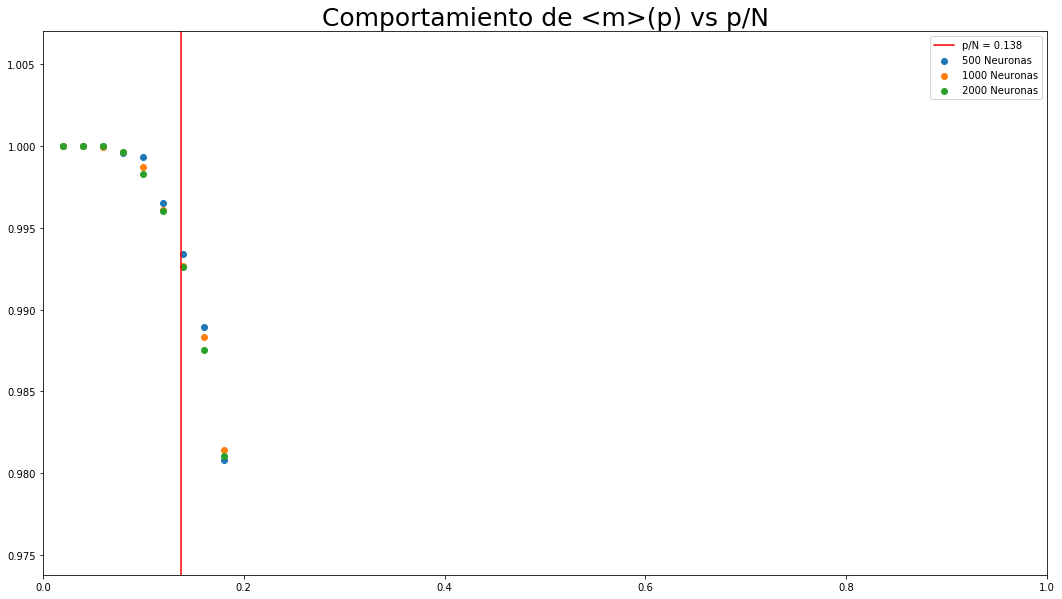

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plt.scatter(p_values[0], mp_values[0], label="500 Neuronas")
plt.scatter(p_values[1], mp_values[1], label="1000 Neuronas")
plt.scatter(p_values[2], mp_values[2], label="2000 Neuronas")
plt.title("Comportamiento de <m>(p) vs p/N", fontsize=25)
plt.axvline(0.138, color='r', label = "p/N = 0.138")
plt.xlim(0, 1)
plt.legend()

## Referencias

http://www.udb.edu.sv/udb/archivo/guia/informatica-ingenieria/sistemas-expertos-e-inteligencia-artificial/2016/i/guia-10.pdf

https://neuronaldynamics.epfl.ch/online/Ch17.S2.html


In [ ]:
p